<a href="https://colab.research.google.com/github/kimdesok/FinanceDataReader/blob/master/BondYields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#API key from the US Fiscal data site 
# 0c62130f938c570fcdf5f817d965907c

ModuleNotFoundError: ignored

In [6]:
!pip install pykrx

from pykrx import stock
from pykrx import bond

     |████████████████████████████████| 92 kB 365 kB/s 
     |████████████████████████████████| 51 kB 423 kB/s 
     |████████████████████████████████| 251 kB 45.9 MB/s 


In [7]:
!pip install -U finance-dataReader
import FinanceDataReader as fdr

     |████████████████████████████████| 48 kB 3.1 MB/s 


In [3]:
from matplotlib.ticker import IndexFormatter
from pandas.core.frame import DataFrame
from datetime import date, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def bond_graph(df, ax1, bToday=False):
  #Things to do.  The type of the available bonds changes depending on the time period. So the index must be adjusted accordingly.
    df.rename({df.columns[0]:'Yield', df.columns[1]: 'Ratio'}, axis=1, inplace=True)
    bond_index = {'국고채 1년':'1yrBond', '국고채 2년':'2yrBond', '국고채 3년':'3yrBond', '국고채 5년':'5yrBond', \
                  '국고채 10년':'10yrBond', '국고채 20년':'20yrBond', '국고채 30년':'30yrBond'}
    
    dfx=[]
    dfy={}
    for idx in df.index:
      try:
        dfy[idx] = bond_index[idx]
        dfx.append(idx)
      except:
        pass
    
    #print(dfx)
    df = df.loc[dfx]

    #print(dfy)
    df.rename(index=dfy, inplace=True)
    df.rename_axis('Bond Types', inplace=True)

    df = df.loc[~(df==0).all(axis=1)]

    #print(df.head())
    
    if(bToday==True):
      print('Last day drawing in bold')
      df['Yield'].plot(ax=ax1, marker='o', linewidth=4, color='red')
    else:
      df['Yield'].plot(ax=ax1, marker='o', linewidth=2)
    


def bond_yield_graphs(start_date, end_date):

  print('\n')
  print('Displaying the data from ', start_date, 'to ', end_date, '\n')
  
  fig, ax1 = plt.subplots(figsize=(20, 10))

  #Generating the dates in timeseries
  dates = (start_date + timedelta(idx + 1) for idx in range((end_date - start_date).days))
  
  for idx in dates:
    str_idx = idx.strftime('%Y%m%d')
    #print(str_idx)
    try:
      df = bond.get_otc_treasury_yields(str_idx)
    except:
      print("The data retrieval on " + str_idx + " is failed.")
      break
    bond_graph(df, ax1)
  #Today's curve
  #end_date = end_date.strftime('%Y%m%d')

  #print(end_date)

  try:
      df_today = bond.get_otc_treasury_yields(end_date.strftime('%Y%m%d'))
  except:
      print("Today data is failed.")
      return

  print(df_today.head(7))
 
  bond_graph(df_today, ax1, True)

  plt.ylabel('Yields')
  plt.title('s. Korean Bond Yields from ' + str(start_date) + ' to ' + str(end_date))
  #plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()
  plt.close()



Displaying the data from  2022-03-15 to  2022-04-12 



findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


           수익률     대비
채권종류                 
국고채 1년   2.202 -0.021
국고채 2년   3.035  0.054
국고채 3년   3.124 -0.062
국고채 5년   3.273 -0.030
국고채 10년  3.311  0.006
국고채 20년  3.282  0.027
국고채 30년  3.166  0.020
Last day drawing in bold


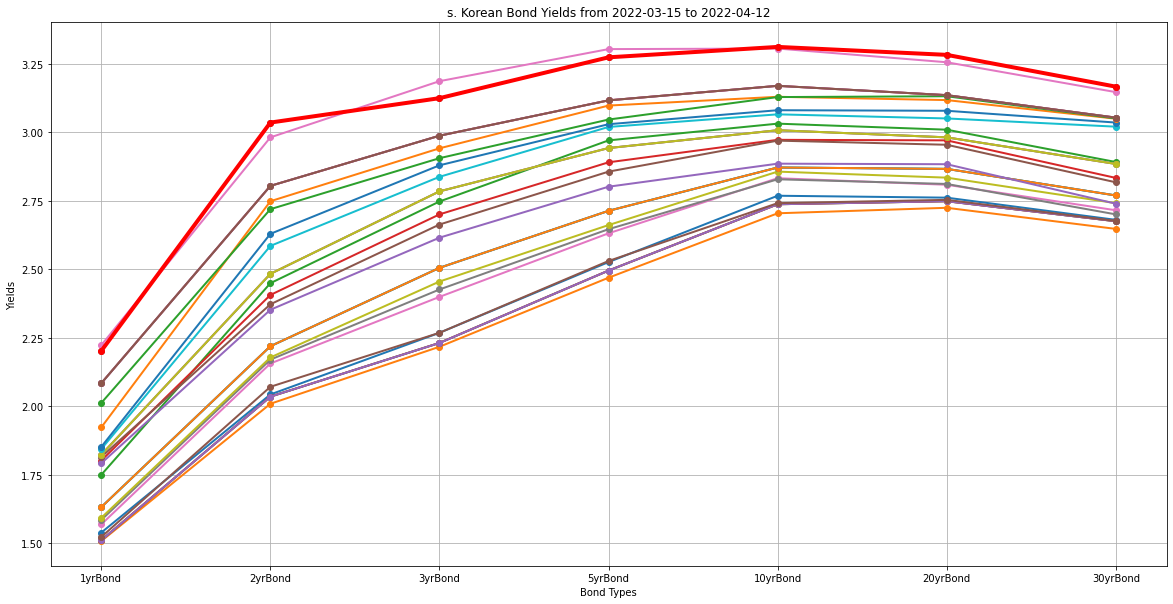



Displaying the data from  2019-12-15 to  2020-01-01 

              수익률     대비
채권종류                    
국고채 1년      1.335 -0.002
국고채 3년      1.360 -0.010
국고채 5년      1.480 -0.005
국고채 10년     1.683  0.000
국고채 20년     1.690 -0.003
국고채 30년     1.682 -0.001
국민주택 1종 5년  1.606 -0.003
Last day drawing in bold


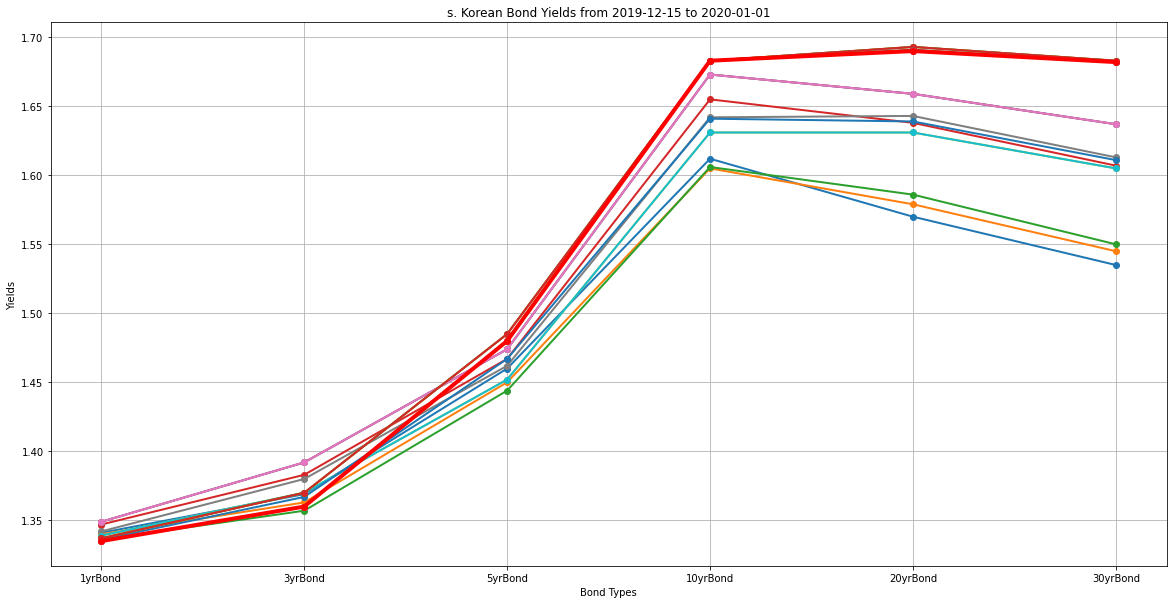

In [ ]:
bond_yield_graphs(date(2022,3,15),  date.today())
bond_yield_graphs(date(2019,12,15),  date(2020,1,1))
bond_yield_graphs(date(2007,1,1),  date(2008,1,1))
bond_yield_graphs(date(1999,1,1),  date(2000,1,1))

## Plotting the bond yields by the types in timeseries
>* types: 1, 2, 3, 5, 10, 20 , and 30 years
>* issues: Before 2020, no data for the 2 year bond available

In [ ]:
def timeseries_bond_yield_graphs(start_date, end_date):

  print('Plotting from', start_date, ' to ', end_date, '\n')

  start_date = start_date.strftime('%Y%m%d')
  end_date = end_date.strftime('%Y%m%d')

  print('\n')
  
  df = pd.DataFrame()

  yields = {'국고채1년':'1yrBond', '국고채2년':'2yrBond', '국고채3년':'3yrBond', '국고채5년':'5yrBond', '국고채10년':'10yrBond', '국고채20년':'20yrBond', '국고채30년':'30yrBond'}

  for idy, idx in yields.items():  
      try:
        df[idx] = bond.get_otc_treasury_yields(start_date, end_date, idy)['수익률']
      except:
        pass
  #print(df.info())
  #df.columns = ['1yrBond', '2yrBond', '3yrBond', '5yrBond', '10yrBond', '20yrBond', '30yrBond']
  df.index.names = ['Date']
  print(df.tail(1))

  df['10yr-1yr'] = (df['10yrBond'] - df['1yrBond']).rolling(5).mean()
  df['10yr-2yr'] = (df['10yrBond'] - df['2yrBond']).rolling(5).mean()
  df['10yr-3yr'] = (df['10yrBond'] - df['3yrBond']).rolling(5).mean()

  #Plotting
  fig, ax1 = plt.subplots(figsize=(16, 10))
  
  #df.plot(ax=ax1, linewidth=2)
  df['10yr-1yr'].plot(ax=ax1, linewidth=2, marker='o')
  df['10yr-2yr'].plot(ax=ax1, linewidth=2,  marker='*')
  df['10yr-3yr'].plot(ax=ax1, linewidth=2,  marker='+')


  plt.xticks(rotation=45)
  plt.ylabel('Yields')
  plt.title('s. Korean Bond Yield Difference Graphs')
  plt.legend()
  plt.grid(True)
  plt.show()  # show the plot
  plt.close()  # close the plot space

Plotting from 2022-01-01  to  2022-04-12 



            1yrBond  2yrBond  3yrBond  5yrBond  10yrBond  20yrBond  30yrBond
Date                                                                        
2022-04-12    2.202    3.035    3.124    3.273     3.311     3.282     3.166


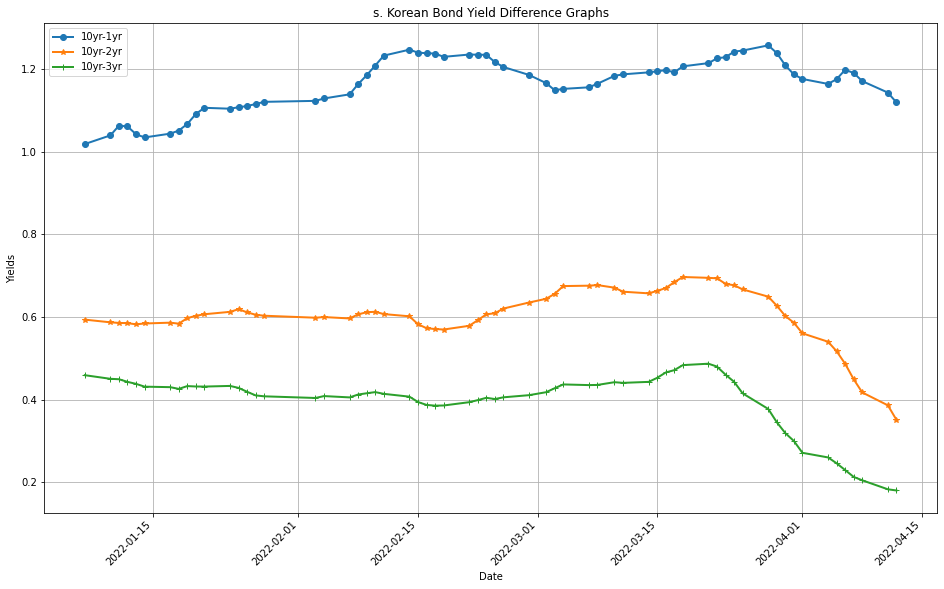

In [ ]:
timeseries_bond_yield_graphs(date(2022,1,1),  date.today())

In [23]:
def us_timeseries_bond_yield_graphs(start_date, end_date):
  print('Plotting from', start_date, ' to ', end_date)

  #S&P 500 Close
  df = fdr.DataReader('US500', start_date, end_date)
  #df.info()

  df = df.pivot_table(index='Date', values=['Close'])
  
  #Bond Yields
  three_m_df = fdr.DataReader('US3MT=X', start_date, end_date)
  one_y_df = fdr.DataReader('US1YT=X', start_date, end_date)
  two_y_df = fdr.DataReader('US2YT=X', start_date, end_date)
  five_y_df = fdr.DataReader('US5YT=X', start_date, end_date)#.rolling(5).mean()
  ten_y_df = fdr.DataReader('US10YT=X', start_date, end_date)
  twenty_df = fdr.DataReader('US20YT=X', start_date, end_date)
  thirty_df = fdr.DataReader('US30YT=X', start_date, end_date)

  df['10yr-3m'] = (ten_y_df['Close'] - three_m_df['Close'])#.rolling(5).mean()
  
  df['10yr-1yr'] = (ten_y_df['Close']  - one_y_df['Close'])#.rolling(5).mean()

  df['10yr-2yr'] = (ten_y_df['Close']  - two_y_df['Close'])#.rolling(5).mean()

  #Plotting
  plt.clf()
  fig, ax1 = plt.subplots(figsize=(16, 10))
  df.rename(columns= {'Close': 'S&P 500'}, inplace=True)

  df[['10yr-3m', '10yr-1yr', '10yr-2yr']].plot(ax=ax1, linewidth=2, marker = 'o')

  df['S&P 500'].plot(ax=ax1, linewidth=4, marker = 'o', color = 'blue', alpha=0.2, secondary_y=['S&P 500'])

  plt.ylabel('Yields')
  plt.title('SP&500 & the difference in short term and long term yields')
  plt.legend(loc='lower left')
  plt.grid(True)
  plt.show()
  plt.close()


  fig, ax2 = plt.subplots(figsize=(16, 10))
  df1 = DataFrame()
  df1['3m'] = three_m_df['Close']
  df1['1yr'] = one_y_df['Close']
  df1['2yr'] = two_y_df['Close']
  df1['5yr'] = five_y_df['Close']
  df1['10yr'] = ten_y_df['Close']
  df1['20yr'] = twenty_df['Close']
  df1['30yr'] = thirty_df['Close']

  df1 = df1.T
  #print(df1.head())
  
  df1.plot(ax=ax2, linewidth=2,legend=None, alpha=0.5)

  df1.iloc[:,-1].plot(ax=ax2, linewidth=4,legend=None, color='red', marker='o')

  print(df1.columns[-32], df1.iloc[:,-3])
  print(df1.columns[-2], df1.iloc[:,-2])
  print(df1.columns[-1], df1.iloc[:,-1])

  plt.ylabel('Yields')
  plt.title('US Bond Yields from ' + str(start_date) + ' to ' + str(end_date))
  plt.grid(True)
  plt.show()
  plt.close()



Plotting from 2022-01-01  to  2022-04-13


<Figure size 432x288 with 0 Axes>

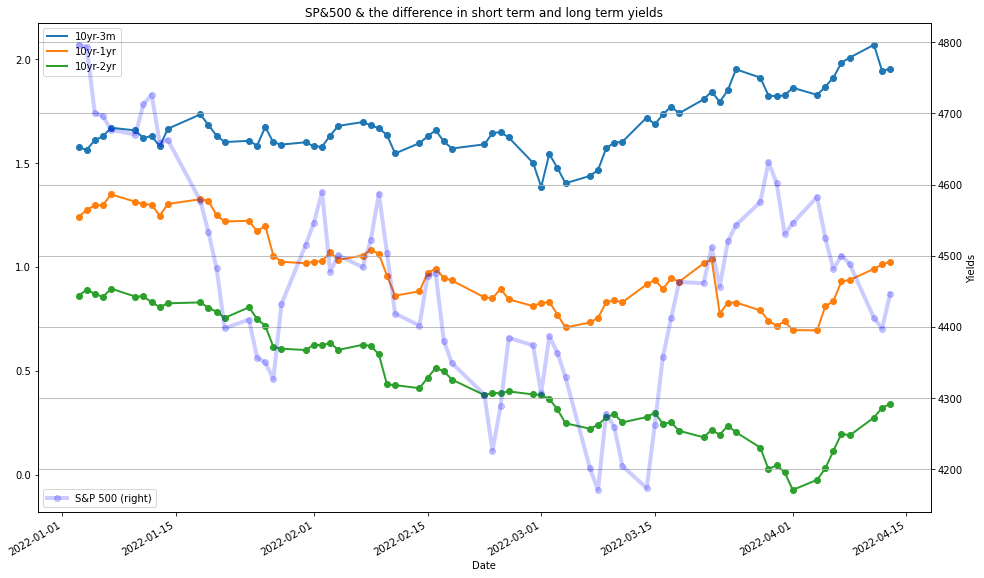

2022-03-08 00:00:00 3m      0.7060
1yr     1.7840
2yr     2.4996
5yr     2.7846
10yr    2.7740
20yr    3.0055
30yr    2.8050
Name: 2022-04-11 00:00:00, dtype: float64
2022-04-12 00:00:00 3m      0.7848
1yr     1.7160
2yr     2.4054
5yr     2.6961
10yr    2.7270
20yr    2.9911
30yr    2.8060
Name: 2022-04-12 00:00:00, dtype: float64
2022-04-13 00:00:00 3m      0.7568
1yr     1.6851
2yr     2.3707
5yr     2.6690
10yr    2.7100
20yr    2.9912
30yr    2.8110
Name: 2022-04-13 00:00:00, dtype: float64


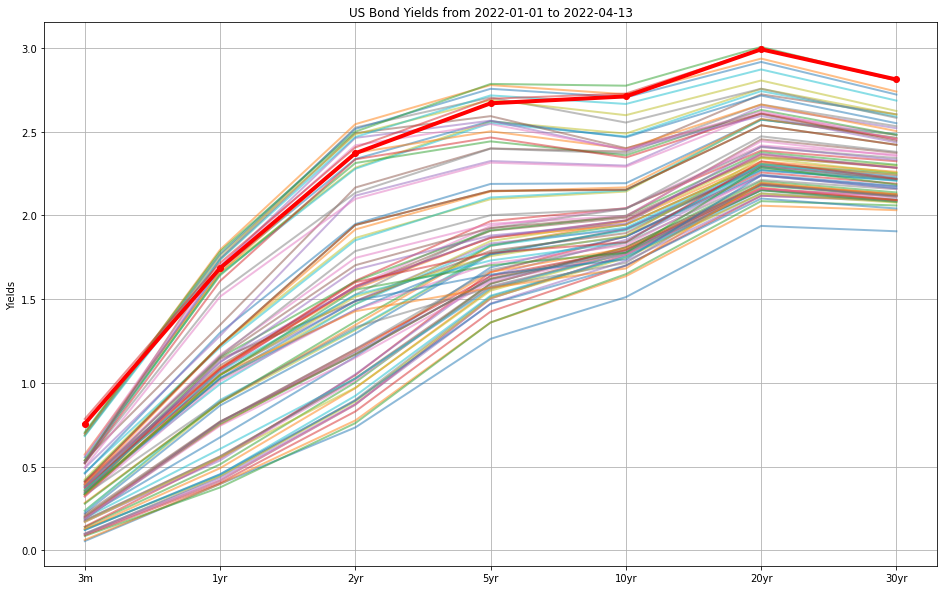

In [24]:
us_timeseries_bond_yield_graphs('2022-01-01',  date.today())

##Errors in fdr.DataReader('KR1YT=RR)
>* It does not return the correct bond yield.
>* For the time being, the DataReader should NOT be used for the bond data retrieval. Useless.


In [ ]:
#s. Korean bond market
# Syntax 'KRNYT=RR' N= 1,2,3,4,5,10,20,30,50

def k_bond_yield_graphs(start_date, end_date):
  print('Plotting from', start_date, ' to ', end_date)

  #S&P 500 Close
  df = fdr.DataReader('KS11', start_date, end_date)
  #df.info()

  df = df.pivot_table(index='Date', values=['Close'])
  
  #Bond Yields
  short_df = fdr.DataReader('KR1YT=RR', start_date, end_date)
  #three_m_df.info()
  ten_y_df = fdr.DataReader('KR10YT=RR', start_date, end_date)
  #ten_y_df.info()
  ten2_y_df = fdr.DataReader('KR20YT=RR', start_date, end_date)
  ten3_y_df = fdr.DataReader('KR30YT=RR', start_date, end_date)

  try:
    df['dy0'] = (ten_y_df['Close'] - short_df['Close']).rolling(5).mean()
  except:
    pass
  try:
    df['dy1'] = (ten2_y_df['Close'] - short_df['Close']).rolling(5).mean()
  except:
    pass
  try:
    df['dy2'] = (ten3_y_df['Close'] - short_df['Close']).rolling(5).mean()
  except:
    pass
  
  #df['dy1_df'] = ten_y_df - one_y_df

  df.rename(columns= {'Close': 'KOSPI', 'dy0':'10 yr - 1 yr yields'}, inplace=True)
  #df.info()

  #Plotting
  fig, ax1 = plt.subplots(figsize=(16, 10))
  
  df.plot(ax=ax1, linewidth=2, secondary_y=['10 yr - 1 yr yields', 'dy1', 'dy2'])



  plt.ylabel('Yields')
  #plt.title('SP&500 & 50 & 200 days ave. along with the difference in short term and long term yields')
  plt.title('KOSPI & the difference in short term and long term yields')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()
  plt.close()

  #plt.figure.figsize = (25,5)
  #three_m_df.plot(label='Three month Bond')
  #one_y_df.plot(label='One year Bond')
  #five_y_df.plot(label='Five year Bond')
  #ten_y_df.plot(label='Ten year Bond')
  #plt.legend()
  #plt.grid(True)
  #plt.show()
  #plt.close()


  #df.to_csv('out.csv')

#bond_yield_graphs('2020-01-01',  date.today())

In [ ]:
def daily_bond_yield_graphs(start_date, end_date):
  print('\n')
  print('Plotting from', start_date, ' to ', end_date, '\n')

  #Bond Yields 1,2,3,4,5,10,20,30,50

  #plotting
  df = pd.DataFrame()

  try:
    df['1 yr'] = fdr.DataReader('KR1YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['2 yr'] = fdr.DataReader('KR2YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['3 yr'] = fdr.DataReader('KR3YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['4 yr']  = fdr.DataReader('KR4YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['5 yr'] = fdr.DataReader('KR5YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['10 yr']  = fdr.DataReader('KR10YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['20 yr']  = fdr.DataReader('KR20YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['30 yr'] = fdr.DataReader('KR30YT=RR', start_date, end_date)['Close']
  except:
    pass
  try:
    df['50 yr']  = fdr.DataReader('KR50YT=RR', start_date, end_date)['Close']
  except:
    pass

  fig, ax1 = plt.subplots(figsize=(20, 10))
  df.plot(ax=ax1)

  plt.ylabel('Yields')
  plt.title('yields')
  #plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()
  plt.close()